# Data exploration Object detection

In [2]:
import os
import sys
import glob

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0, os.path.abspath(os.path.join('..')))
# from mmdetection_modules.datasets.treeAI4species import TreeAI4SpeciesDataset
from util import label_file_to_list, plot_image_with_boxes

In [3]:
root_dir = "/Stor1/wout/TreeAI4Species/ObjDet/"
dir_example = os.path.join(root_dir, "12_RGB_ObjDet_640_fL")

    label  x_center  y_center     width    height
0      52  0.394531  0.983594  0.079687  0.032813
1      21  0.867188  0.089844  0.265625  0.179688
2      21  0.630469  0.142187  0.289062  0.278125
3      21  0.104688  0.296094  0.209375  0.239063
4      21  0.695312  0.405469  0.268750  0.254688
5      21  0.152344  0.810156  0.304688  0.289062
6      21  0.518750  0.896875  0.187500  0.206250
7      21  0.918750  0.939844  0.162500  0.120313
8      21  0.319531  0.299219  0.320312  0.367188
9      21  0.737500  0.660937  0.384375  0.396875
10     21  0.002344  0.725781  0.004687  0.032813
11     21  0.387500  0.078906  0.296875  0.157812
12     21  0.871875  0.302344  0.256250  0.254688
13     21  0.483594  0.468750  0.235937  0.306250
14     21  0.135156  0.544531  0.270313  0.292187
15     21  0.946875  0.650781  0.106250  0.348438
16     21  0.344531  0.823438  0.204687  0.293750
17     21  0.683594  0.936719  0.260937  0.126562
18     21  0.144531  0.927344  0.289062  0.145313


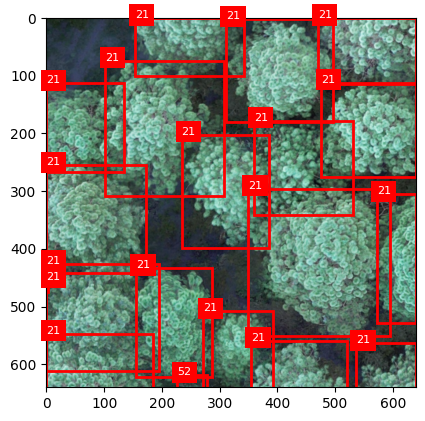

In [5]:
example_id = "000000002859"
# example_id = "000000001711"
# example_id = "000000002854"

label_file = os.path.join(dir_example, "train", "labels", f"{example_id}.txt")
img_file = os.path.join(dir_example, "train", "images", f"{example_id}.png")


print(label_file_to_list(label_file))
plot_image_with_boxes(img_file, label_file)

read in all bboxs, get min width, and max y_center and y_center

In [ ]:
all_label_files = glob.glob(os.path.join(dir_example, "train", "labels", "*.txt"))


max_x_center = -1
max_y_center = -1
min_y_center = 2
min_x_center = 2
max_width = 0
max_height = 0
min_width = -1
min_height = -1
for file in all_label_files:
    label_file = os.path.join(dir_example, "train", "labels", f"{example_id}.txt")
    bboxs = label_file_to_list(label_file)

    maxs = bboxs.max()
    mins = bboxs.min()

    print(maxs)

    print(mins)

    break

label       52.000000
x_center     0.989062
y_center     0.911719
width        0.462500
height       0.407813
dtype: float64
label       24.000000
x_center     0.069531
y_center     0.000781
width        0.009375
height       0.001563
dtype: float64
